In [2]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [3]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

# **************************************************************************************************************#

path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

#

df = mpt.drop_a_column(df, "Unnamed: 0")

#

df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)




# optional 1

df["data_point_number"] = df.index + 1

# optional 2

df  = mpt.counter_for_maintenance(df , "2020-02-01 00:00:00", f1_finish)
df  = mpt.counter_for_maintenance(df , f1_finish, f2_finish)
df  = mpt.counter_for_maintenance(df , f2_finish, f3_finish)
df  = mpt.counter_for_maintenance(df , f3_finish, f4_finish)
df = mpt.counter_for_maintenance(df, f4_finish, "2020-09-01 03:59:51")



#

all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =["counter",'data_point_number','TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

#

df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)

# optional 3

df_clustered = mpt.apply_kmeans_clustering(df_scaled, 5, "condition")

In [4]:
datetime_column = df.columns[0]  # Adjust this if your datetime column isn't the first one

# Add month and week number columns
df_clustered['number_of_the_month'] = df_clustered[datetime_column].dt.month
df_clustered['number_of_the_week'] = df_clustered[datetime_column].dt.isocalendar().week
df_clustered["number_of_the_day"] = df_clustered[datetime_column].dt.isocalendar().day


df_clustered['number_of_the_month'] = df_clustered['number_of_the_month'].astype('float64')
df_clustered['number_of_the_week'] = df_clustered['number_of_the_week'].astype('float64')
df_clustered['number_of_the_day'] = df_clustered['number_of_the_day'].astype('float64')

In [5]:
def aggregate(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8):
    

    result1 = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")

    probabilities = result1[0]
    y_test = result1[1]

    #probabilities = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")[0]
    #y_test = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "no")[1]
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition(df_ed, aggregation_size)
    return result


def agg_new_deneme(penalty, C_value, solver, max_iter,df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):

    result1 = mpt.get_the_probabilities_with_logistic_regressionn_new(penalty, C_value, solver, max_iter,df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)

    probabilities = result1[0]
    y_test = result1[1]

    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_random_forest(n, f, d, s, l, df, aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_random_forest_new(n, f, d, s, l, df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_single_tree(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_single_tree(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result



def plot_probabilities_by_condition(df, threshold): # tekrar yazılacak

    indices = np.arange(df.shape[0])
    
    # Create figure
    plt.figure(figsize=(8, 5))
    
    # Plot points with condition=0 and proba <= threshold in blue
    mask_0_below = (df['condition'] == 0) & (df['proba'] <= threshold)
    plt.scatter(indices[mask_0_below], df.loc[mask_0_below, 'proba'], 
                color='blue', alpha=0.7, label='condition=0')
    
    # Plot points with condition=0 and proba > threshold in red
    mask_0_above = (df['condition'] == 0) & (df['proba'] > threshold)
    plt.scatter(indices[mask_0_above], df.loc[mask_0_above, 'proba'], 
                color='red', alpha=0.7, label=f'condition=0, proba>{threshold}')
    
    # Plot points with condition=1 in black
    mask_1 = df['condition'] == 1
    plt.scatter(indices[mask_1], df.loc[mask_1, 'proba'], 
                color='black', alpha=0.7, label='condition=1')

    
    # Add labels and title
    plt.title('Probablity of Failure')
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [6]:
def calculate_scores(df):
    
    # Condition değeri 1 olan satırları bul
    condition_1_rows = df[df['condition'] == 1].index.tolist()
    
    if not condition_1_rows:
        print("Condition değeri 1 olan satır bulunamadı.")
        return
    
    # Condition 1 olan grupları bul
    groups = []
    current_group = [condition_1_rows[0]]
    
    for i in range(1, len(condition_1_rows)):
        # Eğer ardışık indeksler ise aynı gruba ekle
        if condition_1_rows[i] == condition_1_rows[i-1] + 1:
            current_group.append(condition_1_rows[i])
        else:
            # Değilse yeni grup başlat
            groups.append(current_group)
            current_group = [condition_1_rows[i]]
    
    # Son grubu eklemeyi unutma
    if current_group:
        groups.append(current_group)
    
    # Early score hesaplama (her grup için ilk 1'den önceki 75 satır)
    early_score = 0
    early_rows_count = 0
    
    for group in groups:
        # Gruptaki ilk 1'in indeksi
        first_one_idx = group[0]
        # İlk 1'den önceki 75 satır (ya da mümkün olan maksimum)
        start_idx = max(0, first_one_idx - 400)
        rows_to_consider = df.iloc[start_idx:first_one_idx]

        for _, row in rows_to_consider.iterrows():
            if row['proba'] > 0.5:
                early_score += (row['proba'] - 0.45)
                early_rows_count += 1

    # False score hesaplama (condition=0 ve proba>0.4 olan yerler için)
    false_score = 0
    false_rows_count = 0
    condition_0_rows = df[df['condition'] == 0]
    
    for _, row in condition_0_rows.iterrows():
        if row['proba'] > 0.5:
            # 0.4'ü aşan kısmı topla
            false_score += (row['proba'] - 0.45)
            false_rows_count += 1


    false_score = -1*false_score + early_score
    # Sonuçları yazdır
    print(f"Early Score: {early_score:.6f} (kullanılan satır sayısı: {early_rows_count})")
    print(f"False Score: {false_score:.6f} (kullanılan satır sayısı: {false_rows_count})")
    print(early_score + false_score)
    
    return early_score, false_score

In [7]:
import pandas as pd
import random

def select_columns(df):
    required_cols = ['condition', 'timestamp', 'Oil_temperature', 'DV_pressure']
    selected_cols = required_cols.copy()

    # Zamanla ilgili sütunlar ya da data_point_number %100 olasılık içinde seçim yapılır
    choice = random.random()

    if choice < 0.1:
        selected_cols.append('data_point_number')
    elif choice < 0.2:
        selected_cols += ['number_of_the_month', 'number_of_the_week', 'number_of_the_day']
    elif choice < 0.3:
        selected_cols.append('number_of_the_month')
    elif choice < 0.4:
        selected_cols.append('number_of_the_week')
    elif choice < 0.5:
        selected_cols.append('number_of_the_day')
    # else: %50 ihtimalle hiçbirini alma → hiçbir şey eklenmiyor

    # Cluster sütunu %20 ihtimalle alınır
    if random.random() < 0.2:
        selected_cols.append('Cluster')

    # Diğer sütunlar %35 ihtimalle alınır
    remaining_cols = [
        'TP2', 'TP3', 'H1', 'Reservoirs', 'Motor_current', 'COMP', 'DV_eletric',
        'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
        'counter'
    ]
    for col in remaining_cols:
        if random.random() < 0.35:
            selected_cols.append(col)

    selected_cols = list(dict.fromkeys(selected_cols))
    return df[selected_cols]


In [57]:
def fit_the_model_and_get_the_best_scores(w_, n_, d_, l_, t_, df, a_=[400], b_=[100]):

    score_best = -10000

    score2_best = -1000

    opt_df = df

    best_set= []

    iteration = 0

    for i in n_:
        for j in d_:
            for k in l_:
                for t in t_:
                    for a in a_:
                        for b in b_:
                            for w in range(w_):
                                
                                    iteration += 1
                                    print(iteration)
                                    print()
                                    print(i,j,k, t, a, b)

                                    aggregation_size = a

                                    dataframe = select_columns(df)

                                    print(dataframe.columns)

                                    aggregated_probabilities = agg_new_deneme(i, j, k, t, dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 18, 18, "yes", "yes", "no", "no", b)

                                    score1, score2 = calculate_scores(aggregated_probabilities)

                                    if abs(score2) < 5 :

                                        if score_best > score1:

                                            score_best = score1
                                            best_set = [iteration, i, j, k , t, a, b]
                                            print("better is found for 2")
                                            opt_df = dataframe
                                            score2_best = score2


                                            print()
                                            print("********************************************************************************************************************************************************************************************************************************************************************************")
                                            print()

    print("final_result")
    print(best_set, score_best, score2_best)

    return opt_df

                

In [58]:
df = df_clustered.copy()

In [59]:
df.columns.tolist()

['timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Pressure_switch',
 'Oil_level',
 'Caudal_impulses',
 'condition',
 'data_point_number',
 'counter',
 'Cluster',
 'number_of_the_month',
 'number_of_the_week',
 'number_of_the_day']

In [60]:
list1 = ["l2"]
list2 = [1, 0.5, 0.75, 0.8, 0.6]
list3 = ["lbfgs", "liblinear", "saga"]
list4 = [50, 100, 250, 500]
list5 = [400, 800, 200]
list6 = [100, 50, 75, 150]



list1 = ["l2"]
list2 = [1, 0.75, 0.5]
list3 = ["lbfgs"]
list4 = [50]
list5 = [400]
list6 = [100]

In [61]:
opt_df1= fit_the_model_and_get_the_best_scores(5, list1, list2, list3 , list4 , df, list5, list6)

1

l2 1 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_month', 'number_of_the_week', 'number_of_the_day',
       'Motor_current', 'COMP'],
      dtype='object')
7
(7, 7)
                     Coefficient  p_value
COMP                   -2.955668      0.0
DV_pressure             1.202945      0.0
Motor_current          -0.946254      0.0
number_of_the_month    -0.819299      0.0
Oil_temperature         0.710019      0.0
number_of_the_day       0.630756      0.0
number_of_the_week     -0.040419      0.0
Intercept: -0.6560833361049424
R-squareddd: 0.8853927330009214
F-Value: 110733.29216470022
Early Score: 0.119902 (kullanılan satır sayısı: 1)
False Score: -0.311893 (kullanılan satır sayısı: 3)
-0.19199162955980958
2

l2 1 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_month', 'TP3', 'Reservoirs', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Oil_level', 'counter'],
      d

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


11
(11, 11)
                     Coefficient       p_value
LPS                   -11.900282  0.000000e+00
counter                 3.176911  0.000000e+00
Oil_temperature         2.099686  0.000000e+00
number_of_the_month     1.470727  0.000000e+00
TP3                    -1.336230  0.000000e+00
MPG                    -0.972093  0.000000e+00
DV_pressure             0.825507  0.000000e+00
Reservoirs             -0.587775  1.332268e-15
Oil_level              -0.510171  0.000000e+00
DV_eletric              0.318541  0.000000e+00
Towers                  0.181069  0.000000e+00
Intercept: -14.441139678530414
R-squareddd: 0.9611518071826967
F-Value: 225664.69628436936
Early Score: 0.710893 (kullanılan satır sayısı: 6)
False Score: -0.598034 (kullanılan satır sayısı: 11)
0.11285854881096036
3

l2 1 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_week', 'TP2', 'H1', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='obj

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9
(9, 9)
                     Coefficient  p_value
DV_eletric            -10.796641      0.0
number_of_the_month     5.495705      0.0
counter                 4.310449      0.0
H1                     -4.309386      0.0
MPG                    -1.965098      0.0
Oil_temperature         1.462582      0.0
DV_pressure             1.162554      0.0
Motor_current          -0.881388      0.0
Pressure_switch         0.790459      0.0
Intercept: -32.53957094469171
R-squareddd: 0.9516691774398903
F-Value: 219514.44583680885
Early Score: 217.991062 (kullanılan satır sayısı: 404)
False Score: -492.533849 (kullanılan satır sayısı: 1671)
-274.5427865524873
7

l2 0.75 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'TP3',
       'Reservoirs', 'COMP', 'Caudal_impulses'],
      dtype='object')
6
(6, 6)
                 Coefficient   p_value
COMP               -1.691020  0.000000
DV_pressure         1.351546  0.000000
Caudal_impulses     0.723118  0.000000
Oil_temperat

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8
(8, 8)
                     Coefficient  p_value
number_of_the_month    14.547551      0.0
counter                 9.279776      0.0
Oil_temperature         1.987366      0.0
Reservoirs             -1.735925      0.0
Towers                 -1.009390      0.0
DV_pressure             0.819989      0.0
Motor_current           0.199728      0.0
TP2                    -0.098139      0.0
Intercept: -82.27612966857103
R-squareddd: 0.9620694810287747
F-Value: 318108.88015653356
Early Score: 220.395012 (kullanılan satır sayısı: 403)
False Score: -1149.648010 (kullanılan satır sayısı: 2542)
-929.2529974362919
9

l2 0.75 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'TP3',
       'Pressure_switch', 'Caudal_impulses'],
      dtype='object')
5
(5, 5)
                 Coefficient  p_value
DV_pressure         1.607790      0.0
TP3                -0.595360      0.0
Oil_temperature     0.503891      0.0
Pressure_switch    -0.372585      0.0
Caudal_impulses     0.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Early Score: 0.717114 (kullanılan satır sayısı: 3)
False Score: -1.653206 (kullanılan satır sayısı: 8)
-0.9360919253086508
13

l2 0.5 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_week', 'TP2', 'COMP', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7
(8, 8)
                    Coefficient  p_value
COMP                  -4.766873      0.0
TP2                   -1.459652      0.0
Pressure_switch        1.411444      0.0
DV_pressure            1.404354      0.0
Oil_level              1.041406      0.0
Caudal_impulses        1.041406      0.0
Oil_temperature        0.421222      0.0
number_of_the_week    -0.154760      0.0
Intercept: -0.6993609770821199
R-squareddd: 0.8762159945401411
F-Value: 88777.88296394605
Early Score: 1.058679 (kullanılan satır sayısı: 5)
False Score: -1.102414 (kullanılan satır sayısı: 8)
-0.043734304214075426
14

l2 0.5 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_week', 'TP2', 'H1', 'Reservoirs', 'Motor_current',
       'Towers', 'Oil_level', 'Caudal_impulses'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9
(10, 10)
                    Coefficient  p_value
H1                    -2.078368      0.0
TP2                   -1.297452      0.0
DV_pressure            1.261266      0.0
Oil_temperature        0.760530      0.0
Motor_current         -0.638219      0.0
Reservoirs            -0.344749      0.0
Oil_level             -0.266297      0.0
Caudal_impulses       -0.266297      0.0
number_of_the_week    -0.231598      0.0
Towers                -0.172438      0.0
Intercept: 0.6029071025796774
R-squareddd: 0.8771336683862191
F-Value: 71626.27390322069
Early Score: 0.890970 (kullanılan satır sayısı: 5)
False Score: -1.269623 (kullanılan satır sayısı: 8)
-0.37865337561957935
15

l2 0.5 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'TP3', 'H1',
       'Reservoirs', 'DV_eletric', 'Towers'],
      dtype='object')
7
(7, 7)
                 Coefficient   p_value
DV_pressure         1.358073  0.000000
H1                 -0.781895  0.000000
DV_eletric         -0.5

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'condition', 'data_point_number', 'counter', 'Cluster',
       'number_of_the_month', 'number_of_the_week', 'number_of_the_day'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


20
(21, 21)
                     Coefficient       p_value
data_point_number      13.017938  0.000000e+00
number_of_the_month     7.786069  0.000000e+00
counter                 4.330928  0.000000e+00
number_of_the_day       4.125056  0.000000e+00
LPS                    -3.117167  0.000000e+00
Oil_temperature         3.102211  0.000000e+00
number_of_the_week     -1.821163  0.000000e+00
Cluster                 1.722917  0.000000e+00
DV_eletric             -0.976523  0.000000e+00
TP3                    -0.914834  0.000000e+00
Oil_level              -0.834422  0.000000e+00
Caudal_impulses        -0.834422  0.000000e+00
Reservoirs             -0.585243  0.000000e+00
Motor_current          -0.572628  0.000000e+00
Pressure_switch         0.519443  0.000000e+00
MPG                     0.140113  2.415399e-03
COMP                    0.140002  1.886952e-09
Towers                  0.127732  0.000000e+00
TP2                     0.069946  0.000000e+00
H1                      0.046919  0.000000e+00
D

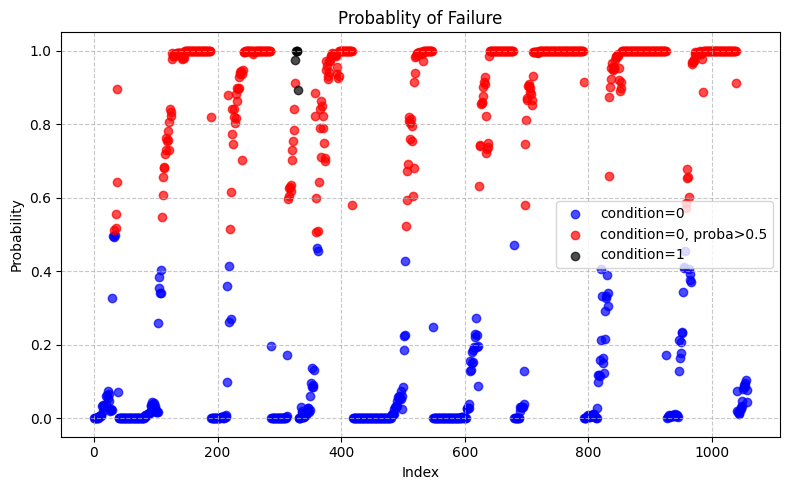

Early Score: 75.917320 (kullanılan satır sayısı: 163)
False Score: -216.119188 (kullanılan satır sayısı: 590)
-140.2018689647365
(np.float64(75.91731952744456), np.float64(-216.11918849218105))


In [56]:
a = 400
b = 400

aggregation_size = a

treshold_probability = 0.5

dataframe = opt_df1

print(dataframe.columns)

aggregated_probabilities = agg_new_deneme("l2", 0.5, "saga", 1000, dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 20, 40, "yes", "yes", "yes", "no", b)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

print(calculate_scores(aggregated_probabilities))